# **Лабораторная работа №6**

## **Задача 6.1.28**
_Дана  формула численного дифференцирования:_
$$ f'(x) \approx \frac{af(x) + bf(x − 12h) + cf(x + h) + df(x − 10h)}{h} $$
_Требуется  исследовать поведение погрешностей при численном дифференцировании._


   

#### **1. Определение коэффициентов $a, b, c, d$, для максимального порядка точности:**
$$ r = f'(x) - f'_{расч}(x) $$
Воспользуемся разложением в ряд Тейлора
$$ f(x+h) = f(x) + f'(x)h + \frac{f''(x)}{2!}h^2 + \frac{f^{(3)}(x)}{3!}h^3 + ... $$

Получаем
$$ r = f'(x) - af(x) - \newline - b \bigg(f(x) - 12hf'(x) + 144h^2\frac{f''(x)}{2} + 1728h^3\frac{f^{(3)}(x)}{6}\bigg) -\newline- c\bigg(f(x) + f'(x)h + \frac{f''(x)}{2}h^2 + \frac{f^{(3)}(x)}{6}h^3\bigg) -\newline- d \bigg(f(x) - 10hf'(x) + 100h^2\frac{f''(x)}{2} + 1000h^3\frac{f^{(3)}(x)}{6}\bigg), $$

$$ r = f'(x) - f(x)\Big(a + b + c + d\Big) + f'(x)h\Big(12b - c +10d\Big) -\newline- f''(x)h^2\Big(72b + \frac{c}{2} + 50d\Big) - f^{(3)}h^3\Big(288b + \frac{c}{6} + \frac{500}{3}d\Big). $$

Чтобы мминимизировать погрешность, можно считать каждое слагаемое за 0. Получаем систему уравнений
$$
    \begin{cases}
        a &+& b &+ &c &+ &d &  = 0,\\
           &&-12b &+ &c &- &10d &  = 1,\\
        &&72b &+ &^c/_2 &+ &50d &  = 0,\\
        &&288b &+ &^c/_6 &+ &^{500}/_3d &  = 0.
    \end{cases}
$$

Её решение:
$$
\begin{cases}
    -\frac{781}{940}\\
    \frac{5}{188}\\
    \frac{40}{47}\\
    -\frac{11}{235}
\end{cases}
$$

Таким образом, наша формула превращается в 
$\quad f'(x) \approx -\frac{781}{940}f(x) + \frac{5}{188}f(x − 12h) + \frac{40}{47}f(x + h) + -\frac{11}{235}f(x − 10h)$.

#### **2. Python-функции полученной формулы и формулы правой разностной производной:**

In [1]:
def right_der(x, h, f):
    return (f(x + h) - f(x))/h

def given_der(x, h, f):
    return (-781/940*f(x) + 5/188*f(x-12*h) + 40/47*f(x+h) - 11/235*f(x-10*h))/h

#### **3. В качестве тестовой функции для проверки корректности работы программы взять функцию из задачи 5.1.**
Функция из 5.1:$ \quad P(x) = 3.9 - 0.4x + 2.7x^2 + 0.7x^3 \quad x \in [1, 3] $

##### **На отрезке [a,b] построить графики точной производной и полученные по формулам  численного дифференцирования, выбрав шаг  h0=0.0001**

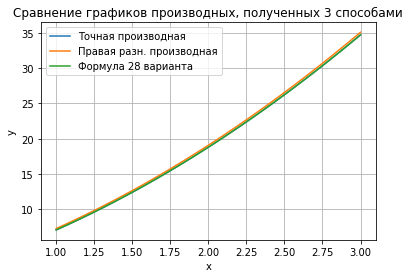

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3.9 - 0.4*x + 2.7*x**2+0.7*x**3
    
def df(x):
    return -0.4 + 5.4*x + 2.1*x**2

a = 1
b = 3
n = 50
h = (b-a)/n
x = np.linspace(a, b, n)
f1 = [df(el) for el in x]
f2 = [right_der(el, h, f) for el in x]
f3 = [given_der(el, h, f) for el in x]

plt.title("Сравнение графиков производных, полученных 3 способами") # заголовок
plt.xlabel("x") 
plt.ylabel("y") 
plt.grid()
plt.plot(x, f1, label="Точная производная")  
plt.plot(x, f2, label="Правая разн. производная") 
plt.plot(x, f3, label="Формула 28 варианта") 
plt.legend()

#### **4. Взять функцию из задачи 5.2. Выбрать фиксированную точку на отрезке [a,b] и вычислить значения производных  по формулам  численного дифференцирования,  уменьшая шаг дифференцирования  h0=0.1 последовательно в 10 раз: , k=0,1,2,…**

In [3]:
def f_2(x):
    return 7*2**x*np.cos(2*np.pi*x)

def df_2(x):
    return 7*np.log(2)*2**x*np.cos(2*np.pi*x) + 7*2**x*np.pi*2*np.sin(2*np.pi*x)

In [4]:
delta1 = []
delta2 = []
x = 2
n = 15
for i in range(n):
    delta1.append(np.abs(df_2(x) - right_der(x, 0.1*0.1**i, f_2)))
    delta2.append(np.abs(df_2(x) - given_der(x, 0.1*0.1**i, f_2)))

for i in range(n):   
    print("{:40.30f}{:40.30f}".format(delta1[i], delta2[i]))

       56.624896368334503904407029040158       50.973938114508989372097857994959
        5.496171827444719326649646973237        0.047711139250935730160563252866
        0.546351364081466783773066708818        0.000509847965105336697888560593
        0.054600964193223688880607369356        0.000006352608366455569921527058
        0.005459752986304522437421837822        0.000000064973505686793942004442
        0.000545970893977454352352651767        0.000000003622584898721470381133
        0.000054612828634503784996923059        0.000000005398945290835399646312
        0.000005763015547444183539482765        0.000000300718266288413360598497
        0.000005605668221164705755654722        0.000006493846640864830987993628
        0.000001499759136436296103056520        0.000021483773579689113830681890
        0.000353771608743613796832505614        0.000065113622341073096322361380
        0.003906485287544114726188126951        0.004794663707244239958527032286
        0.010304369427661441

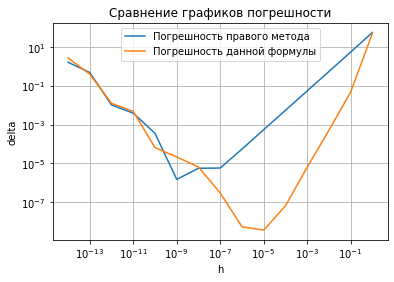

In [5]:
x = [0.1**el for el in range(n)]
d1 = delta1
d2 = delta2

plt.title("Сравнение графиков погрешности") # заголовок
plt.xlabel("h") 
plt.ylabel("delta") 
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.plot(x, d1, label="Погрешность правого метода")  
plt.plot(x, d2, label="Погрешность данной формулы") 
plt.legend()

**Вывод:** из представленного графика можно понять, что минимум погрешности для данной в задании формулы достигается при $h = 10^{-5}$ и этот минимум значительно меньше минимума правой разностной производной, который достигается при $h = 10^{-9}$ и больше первой более чем в 100 раз. При уменьшении $h$ погрешность увеличивается из-за роста неустранимой погрешности.

## **Задача 6.2.28**
_Найти  приближенное решение  задачи Коши для обыкновенного дифференциального  уравнения (ОДУ) 1 порядка с точностью $ \varepsilon = 10^{-6}$_
$$ y' = \frac{2 + \sqrt{t}}{4t}y(t) \qquad t\in[0, 2]$$
$$y(0) = 4$$

#### **1. Аналитическое решение**

$$
\frac{dy}{dt} = \frac{2 + \sqrt{t}}{4t}y \newline
\frac{dy}{y} = \frac{1}{2t}dt + \frac{\sqrt{t}}{4t}dt \newline
\int{\frac{dy}{y}} = \int{\frac{dt}{2t}} + \int{\frac{\sqrt{t}}{4t}dt} \newline
ln(y) = \frac{1}{2}ln(t) + \frac{\sqrt{t}}{2} + c \newline
y = \sqrt{t} e^{\frac{\sqrt{t}}{2}} c_1
$$

Подставим частное решение:
$$
4 = \sqrt{0} e^{\frac{\sqrt{0}}{2}} c_1 \newline
4 = 0
$$
_решения нет?_

#### **2. Составить  программу вычисления  решения  методом Эйлера с  заданной точностью, используя правило Рунге. Найти решение задачи с точностью $ \varepsilon = 10^{-6} $, число точек N и шаг, при котором точность достигается.    Построить график решения.**

In [6]:
def rgt(t, y):
    return (2 + np.sqrt(t))/(4*t)*y


def Eiler(a, b, h, n, fun, t0, y0):
    y = y0
    t = t0
    for i in range(n):
        y = y + h*fun(t, y)
        t += h
    return y

def getRungeEps(a, b, h, n, rgt_fun, t0, y0, counter_fun, p):
    return((counter_fun(a, b, h/2, 2*n, rgt_fun, t0, y0) -
            counter_fun(a, b, h, n, rgt_fun, t0, y0))/(2**p - 1))

Найдём решение с заданной точностью. Для этого организуем перебор возможных N, пока не достигнем точности.

In [7]:
def get_n(a, b, fun, met, p, t0, y0, eps):
    n = 2
    old_n = 2
    h = abs(b - a)/n
    while abs(getRungeEps(a, b, h, n, fun, t0, y0, met, p)) > eps:
        old_n = n
        n *= 2
        h = abs(b-a)/n
    while abs(old_n - n) > 1:
        middle = (n + old_n)//2
        if abs(getRungeEps(a, b, h, middle, fun, t0, y0, met, p)) > eps:
            old_n = middle
        else:
            n = middle
        h = abs(b-a)/n
    return max(n, old_n)

In [8]:
a = 1
b = 3
t0 = 1
y0 = 4
n = get_n(a, b, rgt, Eiler, 1, t0, y0, 1e-6)
h = abs(b-a)/n

In [9]:
print("n = ", n)
print("h = ", h)
print("RungeEps = {:.15f}".format(getRungeEps(a, b, h, n, rgt, t0, y0, Eiler, 1)))

n =  33792
h =  5.918560606060606e-05
RungeEps = 0.000001132006782


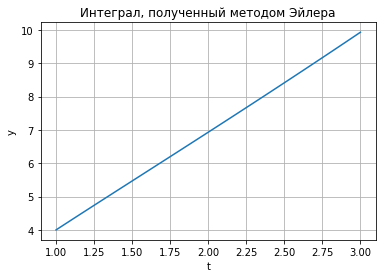

In [10]:
plt.title("Интеграл, полученный методом Эйлера") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
x = np.linspace(a, b, 100)
y = [Eiler(a, b, 2/100, i, rgt, t0, y0) for i in range(100)]
y2 = [np.exp(np.sqrt(t)/2)*np.sqrt(t) for t in x]
plt.plot(x, y) 
# plt.plot(x, y2)
# plt.legend()

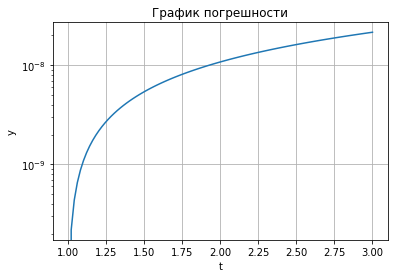

In [11]:
plt.title("График погрешности") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
plt.yscale('log')
# plt.xscale('log')
x = np.linspace(a, b, 100)
y = [abs(getRungeEps(a, b, h, i, rgt, t0, y0, Eiler, 1)) for i in range(100)]
plt.plot(x, y) 
# plt.legend()

#### **3. Составить программу вычисления решения с заданной точностью методом индивидуального варианта. Найти решение задачи с заданной точностью, число точек N и шаг, при котором точность достигается.   Построить график решения задачи.**

_Метод варианта 28 - усовершенствованный метод Эйлера_

In [12]:
def modEiler(a, b, h, n, fun, t0, y0):
    y = y0
    t = t0
    for i in range(n):
        y = y + h*fun(t + h/2, y + h/2 * fun(t, y))
        t += h
    return y

In [13]:
n = get_n(a, b, rgt, modEiler, 2, t0, y0, 1e-6)
h2 = abs(b-a)/n

In [14]:
print("n = ", n)
print("h = ", h)
print("RungeEps = {:.15f}".format(getRungeEps(a, b, h2, n, rgt, t0, y0, modEiler, 2)))

n =  160
h =  5.918560606060606e-05
RungeEps = 0.000001234770314


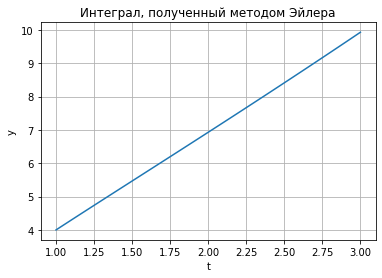

In [15]:
plt.title("Интеграл, полученный методом Эйлера") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
x = np.linspace(a, b, 100)
y = [modEiler(a, b, 2/100, i, rgt, t0, y0) for i in range(100)]
y2 = [np.exp(np.sqrt(t)/2)*np.sqrt(t) for t in x]
plt.plot(x, y) 
# plt.plot(x, y2)
# plt.legend()

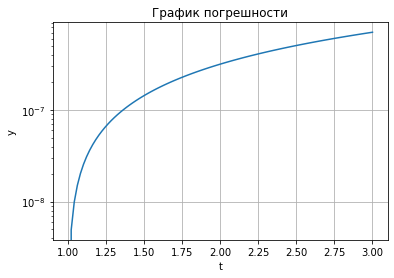

In [16]:
plt.title("График погрешности") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
plt.yscale('log')
# plt.xscale('log')
x = np.linspace(a, b, 100)
y = [abs(getRungeEps(a, b, h2, i, rgt, t0, y0, modEiler, 2)) for i in range(100)]
plt.plot(x, y) 
# plt.plot(x, y2)
# plt.legend()

Сравним теперь два метода (полученные функции и погрешности)

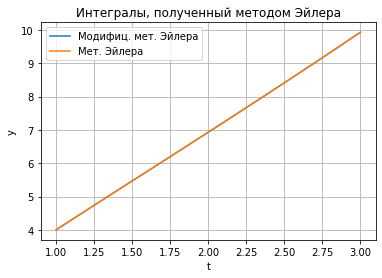

In [22]:
plt.title("Интегралы, полученный методом Эйлера") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
x = np.linspace(a, b, 100)
y = [modEiler(a, b, 2/100, i, rgt, t0, y0) for i in range(100)]
y1 = [Eiler(a, b, 2/100, i, rgt, t0, y0) for i in range(100)]
y2 = [np.exp(np.sqrt(t)/2)*np.sqrt(t)*1.66 for t in x]
plt.plot(x, y, label="Модифиц. мет. Эйлера") 
plt.plot(x, y1, label="Мет. Эйлера") 
# plt.plot(x, y2)
plt.legend()

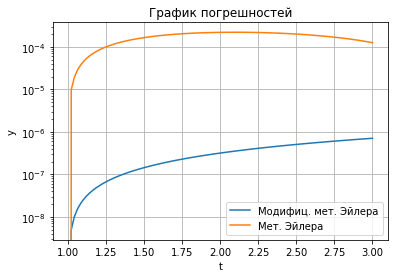

In [18]:
plt.title("График погрешностей") # заголовок
plt.xlabel("t") 
plt.ylabel("y") 
plt.grid()
plt.yscale('log')
# plt.xscale('log')
x = np.linspace(a, b, 100)
y = [abs(getRungeEps(a, b, h2, i, rgt, t0, y0, modEiler, 2)) for i in range(100)]
y2 = [abs(getRungeEps(a, b, h2, i, rgt, t0, y0, Eiler, 1)) for i in range(100)]
plt.plot(x, y, label="Модифиц. мет. Эйлера") 
plt.plot(x, y2, label="Мет. Эйлера") 
plt.legend()